## 📘 Kernel Density Estimation

Any set of $M$ points ${x_1, x_2, ..., x_M}$ each of dimensionality $N$ follow some probability distribution $P(x)$. In many cases, the form of $P(x)$ is known and we only need to estimate its parameters (e.g., normal distribution with mean $\mu$ and covariance $Σ$); however, in the general case the form of the distribution is unknown. Kernel density estimation helps us estimate $P(x)$ without assuming any form for it and while only using the available points ${x_1, x_2, ..., x_M}$.

### ✦ Given
Set of $M$ points ${x_1, x_2, ..., x_M}$ each of dimensionality $N$

### ✦ Wanted 
An accurate estimate of the probability density function $P(x)$

### ✦ Operation

1. Choose a bump function $g(x)$ that integrates to $1$
2. Choose a bandwidth $h$ that will control the spread of the bump function
3. Estimate $P(x)$ as follows:
Define
$$ϕ(x)=\frac{1}{h^N}g(\frac{x}{h})   \tag{1}$$ 
Then compute
$$P(x) = \frac{1}{M} \sum_{m=1}^{M} \phi(x-x_m) \tag{2}$$


**You are required to implement seven methods in `KDEstimator.py` where using any for loop is not allowed:**
<br><br>
```python
__init__(self, bump='Gauss', bandwidth='Silverman')
```
- Sets the chosen bump function and bandwidth which can be that of `Silverman` or `Scott` (introduced below) or any positive real number
<br><br>
```python
fit(self, x_train)
```
- Computes the bandwidth and stores the training data and its shape to be used later for the computation of $P(x)$
- Both Silverman and Scott bandwidth rules of thumb will be considered in this function:

Let
$$ \hat{\sigma} = \frac{1}{N} (\sigma_1+\sigma_2+...+\sigma_N) $$

Then Silverman's rule of thumb was among the optimal choice(s) covered in the lecture:

$$ h = \hat{\sigma} \cdot \left( \frac{4}{{M \cdot (N+2)}} \right)^{\frac{1}{N+4}}$$

Another rule of thumb is Scott's:

$$ h = \hat{\sigma} ⋅ M^{\frac{-1}{N+4}}$$


<br><br>
```python
g(self, x)
```
Implements $g(x)$ for the cases of a standard Gaussian and Rect bump function

- Standard Gaussian
$$g(\mathbf{x}) = \frac{1}{\sqrt{(2\pi)^N}} e^{-\frac{1}{2} \mathbf{x}^T \mathbf{x}}$$

- Rectangular

$$ g(\mathbf{x}) = \begin{cases} 1 & \text{if } -\frac{1}{2} \leq x_i \leq \frac{1}{2} \:  \forall_{i} \\ 0 & \text{otherwise} \end{cases}$$

- The input assumed here is a numpy array of dimensions `(m,n)` and the output is a numpy array of dimensions `(m)` the evaluates the probability of each point.
<br><br>


```python
ϕ(self, x)
```
- Implements $\phi$ as defined in $(1)$
- Thanks to the fact that $g$ is vectorized, $ϕ(x-x_m)$ can be computed at once for all $x_m$ by passing them in a single numpy array

<br><br>
```python
P(self, x)
```
- Implements $P$ as defined in $(2)$. The sum should be performed using Numpy for efficiency.
<br><br>


```python
transform(self, x_data)
```
- Applies $P(x)$ for each row in the given `(m,n)` numpy array `x_data` to return a numpy array `(m,)` of probabilities
<br><br>


```python
fit_transform(self, x_data)
```
- Applies `fit` followed by `transform`

#### Now go to KDEstimator.py and come back for tests


## Unit Tests

These are just some basic tests. Feel free to add more.

In [19]:
%load_ext autoreload
%autoreload 2
# No need to restart the notebook upon change thanks to autoreload

import numpy as np
from KDEstimator import KDEstimator

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Test Scott and Silverman Bandwidth

In [20]:
# this data has standard deviation 1 along each column
x_data= np.array([
    [0, 2],
    [2, 0],
    [0, 2],
    [2, 0]
])

# M => Number of samples => 4
# N => Number of features => 2

# create two KDEstimator objects
kde1 = KDEstimator(bump='Gauss', bandwidth='Silverman')
kde2 = KDEstimator(bump='Gauss', bandwidth='Scott')

# fit the data
kde1.fit(x_data)
kde2.fit(x_data)

# TODO 1: Assume avg_σ=1; compute Silverman and Scott with calculator and assert their values
calculated_silverman = 0.793700526
calculated_scott = 0.793700526

# Compare the first 5 decimal places, the calculator provides less decimal places than the KDEstimator.
assert round(calculated_silverman, 5) == round(kde1.h, 5)
assert round(calculated_scott, 5) == round(kde2.h, 5)

Test Gaussian Bump

In [21]:
import numpy as np
from scipy.stats import multivariate_normal

mean = np.zeros(2)  
covariance = np.eye(2)  
scipy_norm = multivariate_normal.pdf(x_data, mean=mean, cov=covariance)
our_norm = kde1.g(x_data)

# Test the implementation
assert np.allclose(our_norm, scipy_norm, atol=1e-4), "PDF values do not match expected values."

Test Rectangular Bump

In [22]:
x_val = np.array([
    [0, -0.6, 0.6],
    [0, -0.3, 0.3],
    [0.5, -0.5, 0.5],
    [0, 0.1, 0.4],
    [3, -2, 0]
])
kde1 = KDEstimator(bump='Rect', bandwidth='Silverman')

assert np.all(kde1.g(x_val) == np.array([0, 1, 1, 1, 0]))

## End-to-end Tests

### Test Gaussian Kernel with Silverman

Note that because Scipy computes the entire covariance matrix (doesn't make a standard normal assumption), we have allowed for a 1% error. This is also why we will skip testing a float bandwidth (but it should work anyway).

In [23]:
from scipy.stats import gaussian_kde

np.random.seed(42)
x_data = np.random.rand(3000, 2)

kde = KDEstimator(bump='Gauss', bandwidth='Silverman')
kde.fit(x_data)
my_res = kde.transform(x_data)

kernel = gaussian_kde(x_data.T, bw_method='silverman')
res = np.array(kernel(x_data.T))

np.allclose(res, my_res, rtol=0.01)

True

### Test Gaussian Kernel with Scott

In [24]:
np.random.seed(42)
x_data = np.random.rand(3000, 2)

kde = KDEstimator(bump='Gauss', bandwidth='Scott')
my_res = kde.fit_transform(x_data)

kernel = gaussian_kde(x_data.T, bw_method='scott')
res = np.array(kernel(x_data.T))

np.allclose(res, my_res, rtol=0.01)

True

#### Test Gaussian Kernel with Float Bandwidth

In [25]:
# Should yield no error
kde = KDEstimator(bump='Gauss', bandwidth=0.5)
kde.fit(x_data)
my_res = kde.transform(x_data)

## 😎 Put on Your Machine Learning Engineer Glasses

In [26]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [36]:
def plot_3d(x_data, *, densities, titles):
    # TODO 2: Find min and max of x1 and x2 (first two columns of x_data)
    x1_min, x1_max = np.min(x_data[:, 0]), np.max(x_data[:, 0])
    x2_min, x2_max = np.min(x_data[:, 1]), np.max(x_data[:, 1])
    
    # TODO 3: Generate 100 points between min and max values for each dimension
    # np.linspace(start, stop, num)
    x1 = np.linspace(x1_min, x1_max, 100)
    x2 = np.linspace(x2_min, x2_max, 100)
    
    # TODO 4: Form a meshgrid from x1 and x2
    # Generates a grid of coordinates; all posible combinations of elements of x1 and x2.
    x1, x2 = np.meshgrid(x1, x2)
    
    # convert the meshgrid into a (m, n) array to allow evaluation by the model
    x_plot = np.c_[x1.ravel(), x2.ravel()]
    
    # densities is a list of fitted kde instances.
    # TODO 5: Form a list of probabilities evaluated from x_plot by each kde instance using list comprehension
    z = [kde.transform(x_plot) for kde in densities]
    
    # put z in meshgrid shape as the plot function assumes that
    z = [probs.reshape(x1.shape) for probs in z]
    
    # Number of subplots
    num_subplots = len(titles)

    # Creating subplots
    plt.style.use('dark_background')
    fig, axs = plt.subplots(1, num_subplots, figsize=(6 * num_subplots, 7), dpi=140, subplot_kw={'projection': '3d'})

    # for each density we want a plot
    for i, ax in enumerate(axs):
        # TODO 6: Plot z[i] with x1 and x2
        ax.plot_surface(x1, x2, z[i], cmap='plasma', alpha=0.8)
        
        # Set title and labels
        ax.set_title(titles[i])
        ax.set_xlabel('Feature X')
        ax.set_ylabel('Feature Y')
        ax.set_zlabel('Z-axis', labelpad=1)
        # turn off grid and z-axis ticks
        ax.grid(False)
        ax.set_zticks([])
        # turn off planes
        ax.xaxis.pane.fill = False
        ax.yaxis.pane.fill = False
        ax.zaxis.pane.fill = False
        # change view angle
        ax.view_init(elev=50, azim=130)

    # Show the plot
    plt.show()

#### 1. Compare the Choice of Bandwidth

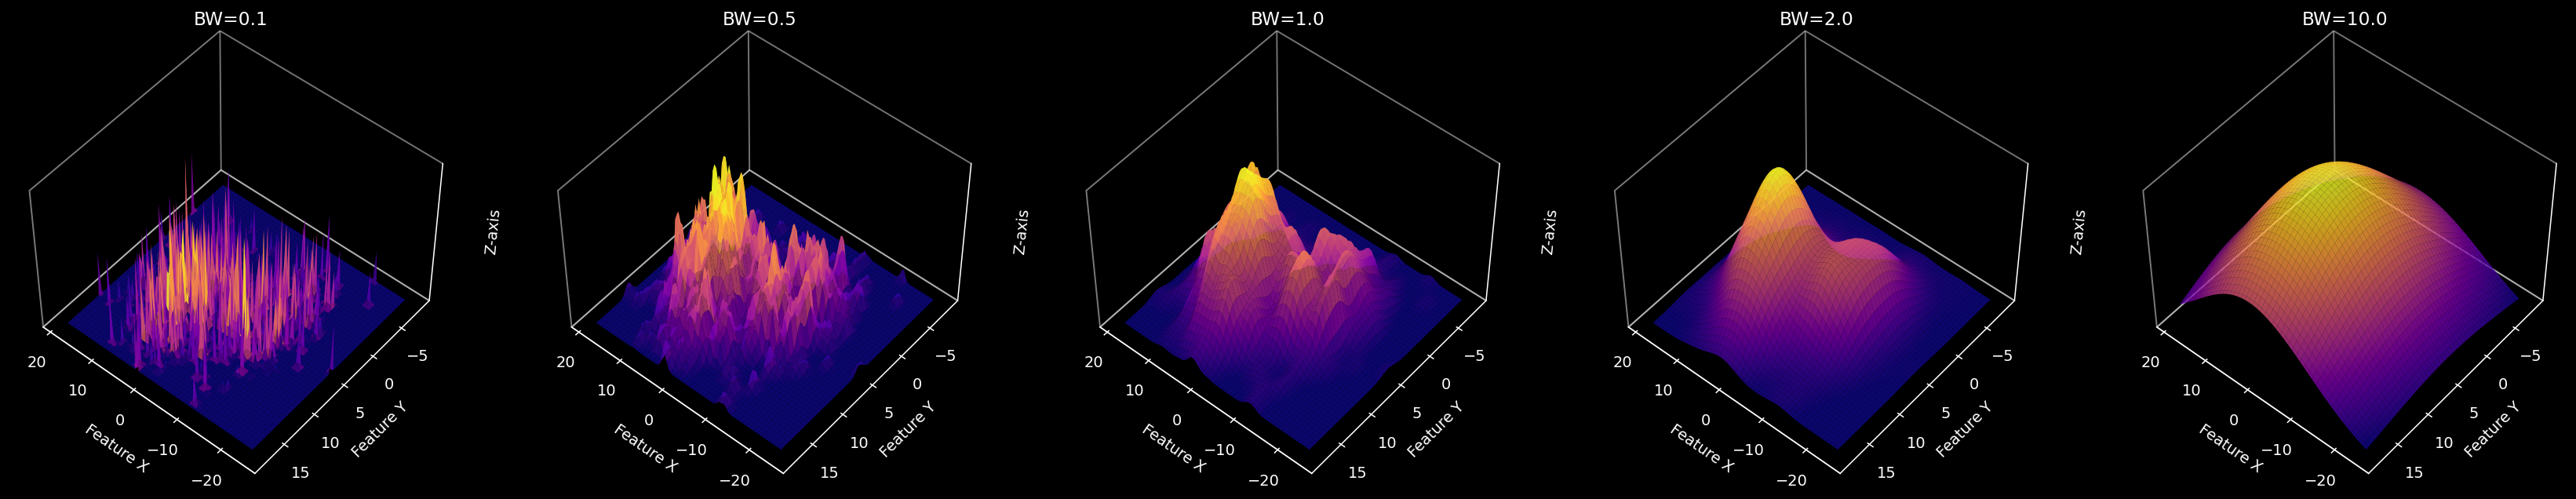

In [35]:
# Generate some random data
x_data, _= datasets.make_blobs(n_samples=1000, centers=3, cluster_std=4.0, center_box=(-10,10), random_state=20)

# TODO 7: Pass bandwidth of 0.1, 0.5, 1.0, 2.0, 10.9 to each following instantiation respectively

kde1 = KDEstimator(bump='Gauss', bandwidth=0.1)
kde1.fit(x_data)

kde2 = KDEstimator(bump='Gauss', bandwidth=0.5)
kde2.fit(x_data)

kde3 = KDEstimator(bump='Gauss', bandwidth=1.0)
kde3.fit(x_data)

kde4 = KDEstimator(bump='Gauss', bandwidth=2.0)
kde4.fit(x_data)

kde5 = KDEstimator(bump='Gauss', bandwidth=10.0)
kde5.fit(x_data)


plot_3d(x_data, densities=[kde1, kde2, kde3, kde4, kde5], titles=['BW=0.1', 'BW=0.5', 'BW=1.0', 'BW=2.0', 'BW=10.0'])

Answer the following questions:
- Why does the estimate get smoother as we increase the bandwidth and get more discontinuous for vice versa?

- Which of the following represents the most optimal choice in your opinion as someone who has seen real data densities before?

- Which of these densities integrate to 1?

In [39]:
''' 
    - Increasing the bandwidth increases the number of points influnced by every point in the training data.
      Hence, the smoother estimate.
    
    - At BW = 2.0, there aren't any "spikes" in the data and the estimate doesn't look as smooth as a typical normal distribution, important details are preserved.

    - All PDFs integrate to 1.
'''

' \n    - Increasing the bandwidth increases the number of points influnced by every point in the training data.\n      Hence, the smoother estimate.\n    \n    - At BW = 2.0, there aren\'t any "spikes" in the data and the estimate doesn\'t look as smooth as a typical normal distribution, important details are preserved.\n\n    - All PDFs integrate to 1.\n'

#### 2. Compare Scott and Silverman

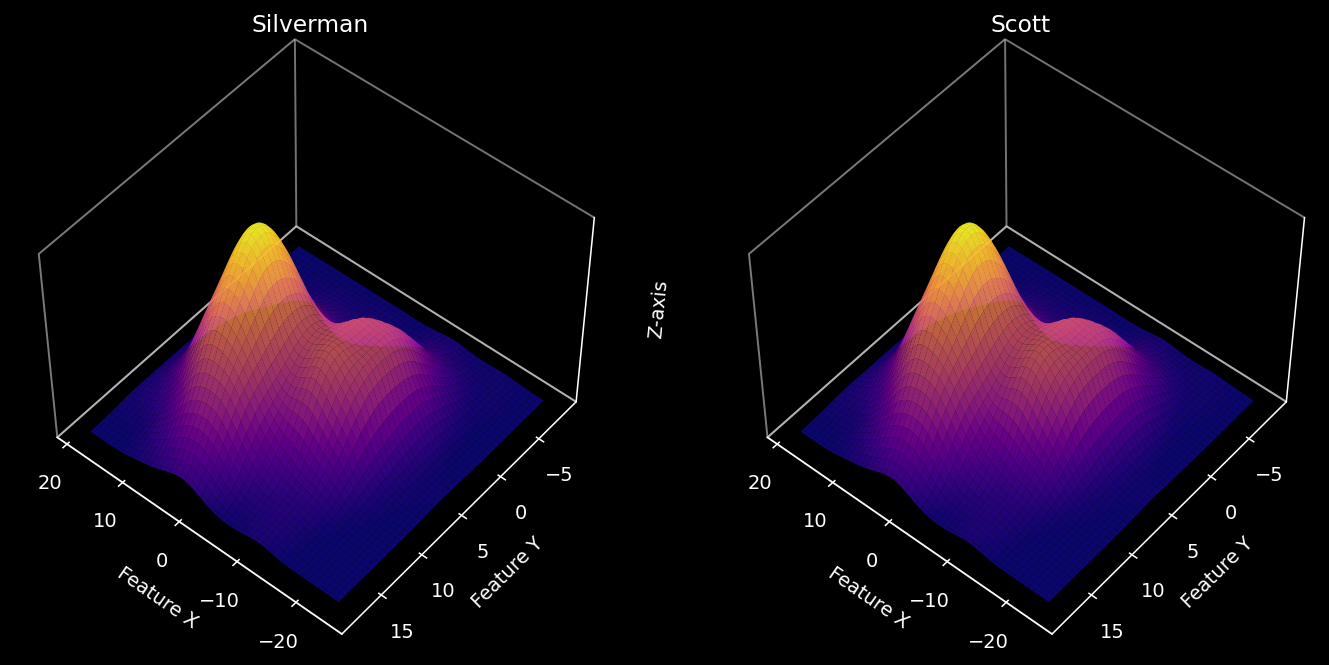

In [37]:
# TODO 8: Pass bandwidth='Silverman' for kde1 and 'Scott' for kde2

kde1 = KDEstimator(bump='Gauss', bandwidth='Silverman')
kde1.fit(x_data)

kde2 = KDEstimator(bump='Gauss', bandwidth='Scott')
kde2.fit(x_data)

plot_3d(x_data, densities=[kde1, kde2], titles=['Silverman', 'Scott'])

[Extra] Read online (e.g., [here](https://stats.stackexchange.com/questions/90656/kernel-bandwidth-scotts-vs-silvermans-rules)) to deduce why there are similar

In [30]:
'''
Dependence on the number of data points (n): 
As the number of data points increases, the density estimate can afford to be more sensitive to small variations in the data. 
This is because with more data, we have a better idea of the underlying distribution. 
Therefore, as n increases, the bandwidth decreases, allowing the kernel to be narrower and the resulting density estimate to be more sensitive to the data.

Dependence on the standard deviation (σ): 
The standard deviation is a measure of the spread of the data. 
If the data points are widely spread out (high σ), a larger bandwidth is needed to ensure that the density estimate does not overfit to the noise in the data. 
Conversely, if the data points are closely packed (low σ), a smaller bandwidth can be used to capture the finer details in the data.

The Silverman and Scott rules of thumb are designed to balance these two factors. 
They decrease the bandwidth as n increases and increase the bandwidth as σ increases, aiming to find a balance between sensitivity to the data and resistance to overfitting.

'''

'\nAnswer goes here.\n'

#### 3. Compare Bump Functions

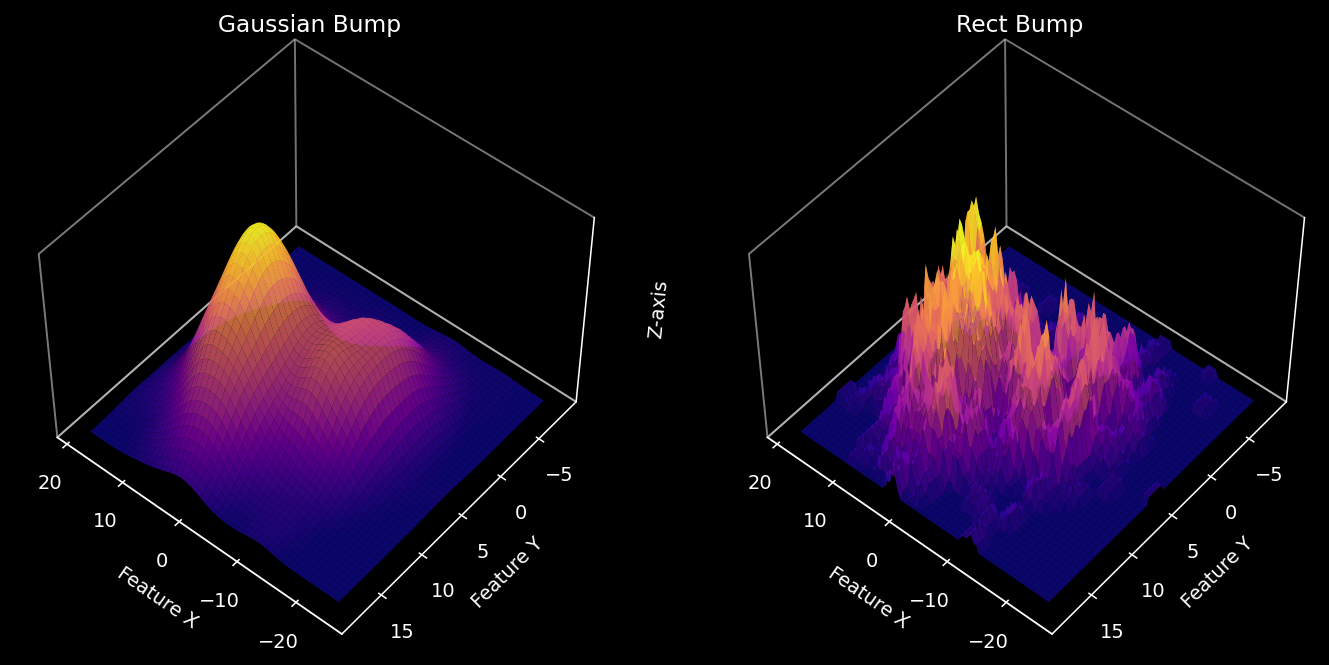

In [38]:
# TODO 8: Pass bump='Gauss' for kde1 and 'Rect' for kde2

kde1 = KDEstimator(bump='Gauss')
kde1.fit(x_data)

kde2 = KDEstimator(bump='Rect')
kde2.fit(x_data)

plot_3d(x_data, densities=[kde1, kde2], titles=['Gaussian Bump', 'Rect Bump'])

Answer the following questions:
- Why is the Rect bump more discontinuous?

- What other density estimator is equivalent to using the rect bump?

In [32]:
'''
    - Beacuse "Rect()" is bandlimited, so the influence of each point on the adjacent ones ends abruptly.

    - Naive Estimator.
'''

'\nAnswer goes here\n'

#### [TODO 9] Change the bandwidth setting for the Rect bump so that the density becomes smooth while remaining as close as possible to the Gaussian version:

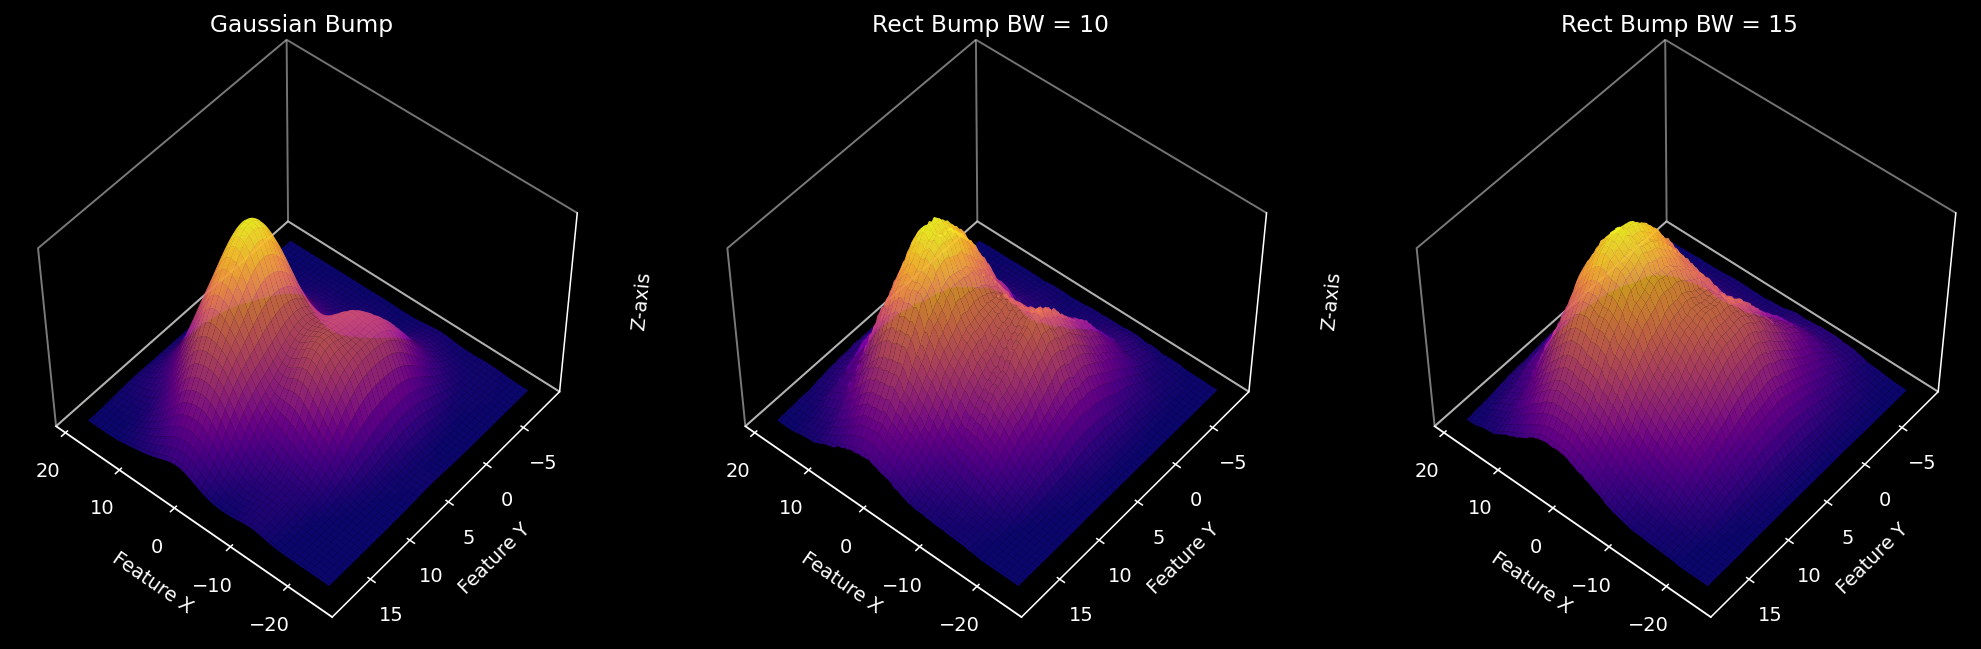

In [51]:
kde1 = KDEstimator(bump='Gauss')
kde1.fit(x_data)

kde2 = KDEstimator(bump='Rect', bandwidth=10)
kde2.fit(x_data)

kde3 = KDEstimator(bump='Rect', bandwidth=13)
kde3.fit(x_data)

plot_3d(x_data, densities=[kde1, kde2, kde3], titles=['Gaussian Bump', 'Rect Bump BW = 10', 'Rect Bump BW = 15'])


### Perfection 👌

<div align="center">
<img width="1300" src="https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExbGszZWVjM2RncGRhYnFhMnc5Z2h6ZmRxbzdyZTgwMHZqMDcycmplYyZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/hWkg5NRbpwW9yIDV3r/giphy.gif">
</div>